<a href="https://colab.research.google.com/github/Aust0/DFEData2/blob/main/DFEDATA2%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Define the problem domain

1. Always- look at the data
      - data.head, tail
      - data.describe()
      - null value
      - reg/classification- value_counts
      







In [ ]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
import pandas as pd
data = pd.read_csv('water_potability.csv', header=0,encoding='latin1')


### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


Data source is https://www.kaggle.com/adityakadiwal/water-potability 

### Q. Identify candidate questions for your machine learning project

The data set contains water quality metrics for 3276 water bodies. I aim create a model to determine if a water sample tested from a water body is fit for drinking ie potable. 

### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
data.tail(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


Some null entries, particularly sulfate col, also pH and Trihalomethanes.  According to data source all pH data is within potable levels (6.5<pH<8.5) but this is not the case.

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.isna().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Confirms null values in ph, Sulfate, Trihalomethanes

In [ ]:
data.isna().any(axis=1).sum()  #number of null rows

1265

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
for col_name in data.columns:
  print(col_name + " " + str(data[col_name].value_counts()))

ph 9.581189    1
7.005230    1
5.768868    1
6.333640    1
3.410360    1
           ..
5.830542    1
6.323040    1
7.628553    1
7.089184    1
6.733494    1
Name: ph, Length: 2785, dtype: int64
Hardness 139.118703    1
162.683275    1
180.843125    1
190.313904    1
110.865788    1
             ..
230.932832    1
198.336900    1
203.744548    1
178.716633    1
227.225751    1
Name: Hardness, Length: 3276, dtype: int64
Solids 24167.842882    1
38969.388992    1
9001.658753     1
16780.116147    1
32170.069160    1
               ..
14877.289737    1
27357.456745    1
24909.444010    1
28653.472342    1
20992.281677    1
Name: Solids, Length: 3276, dtype: int64
Chloramines 7.856557    1
7.650455    1
5.626787    1
9.272066    1
4.038955    1
           ..
7.794727    1
5.845502    1
6.614114    1
4.881377    1
6.060144    1
Name: Chloramines, Length: 3276, dtype: int64
Sulfate 360.322976    1
335.871718    1
400.274579    1
359.710517    1
357.815929    1
             ..
300.500689    1


No duplicates

In [ ]:
data.shape

(3276, 10)

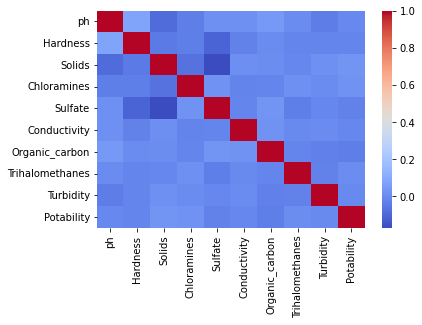

In [ ]:

import numpy
import matplotlib.pyplot as plt
import seaborn as sns

crs = data.corr()
sns.heatmap(crs, cmap='coolwarm')

This heat map shows a high degree of independence between all the variables, and Potability appears to be one of the most independent.

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

For the missing data here, as they are in only three columns my initial approach would be to ask the data source why this data was missing.  However given that the correlation between the variables is weak, it seems that, unusually, the data is missing completely at random.  Therefore I would choose to omit simply omit the null values.

In [ ]:
data=data.dropna (axis=0) #dropping the 1265 null rows
data.info

<bound method DataFrame.info of              ph    Hardness  ...  Turbidity  Potability
3      8.316766  214.373394  ...   4.628771           0
4      9.092223  181.101509  ...   4.075075           0
5      5.584087  188.313324  ...   2.559708           0
6     10.223862  248.071735  ...   2.672989           0
7      8.635849  203.361523  ...   4.401425           0
...         ...         ...  ...        ...         ...
3267   8.989900  215.047358  ...   4.613843           1
3268   6.702547  207.321086  ...   3.442983           1
3269  11.491011   94.812545  ...   4.369264           1
3270   6.069616  186.659040  ...   3.669712           1
3271   4.668102  193.681735  ...   4.435821           1

[2011 rows x 10 columns]>

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

This is a classification problem with fewer than 100k rows so suitable algorithms may include Linear SVC, K-Neighbours Classifier, SVC and Ensemble Classifiers.

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

It's a classification problem and accuracy would be a suitable metric.

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/